In [3]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import cv2

In [14]:
filename= 'cat.jpg'
with Image.open(filename) as img:
    img.load()

In [15]:
img_cv = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img_cv.shape

(1281, 1920)

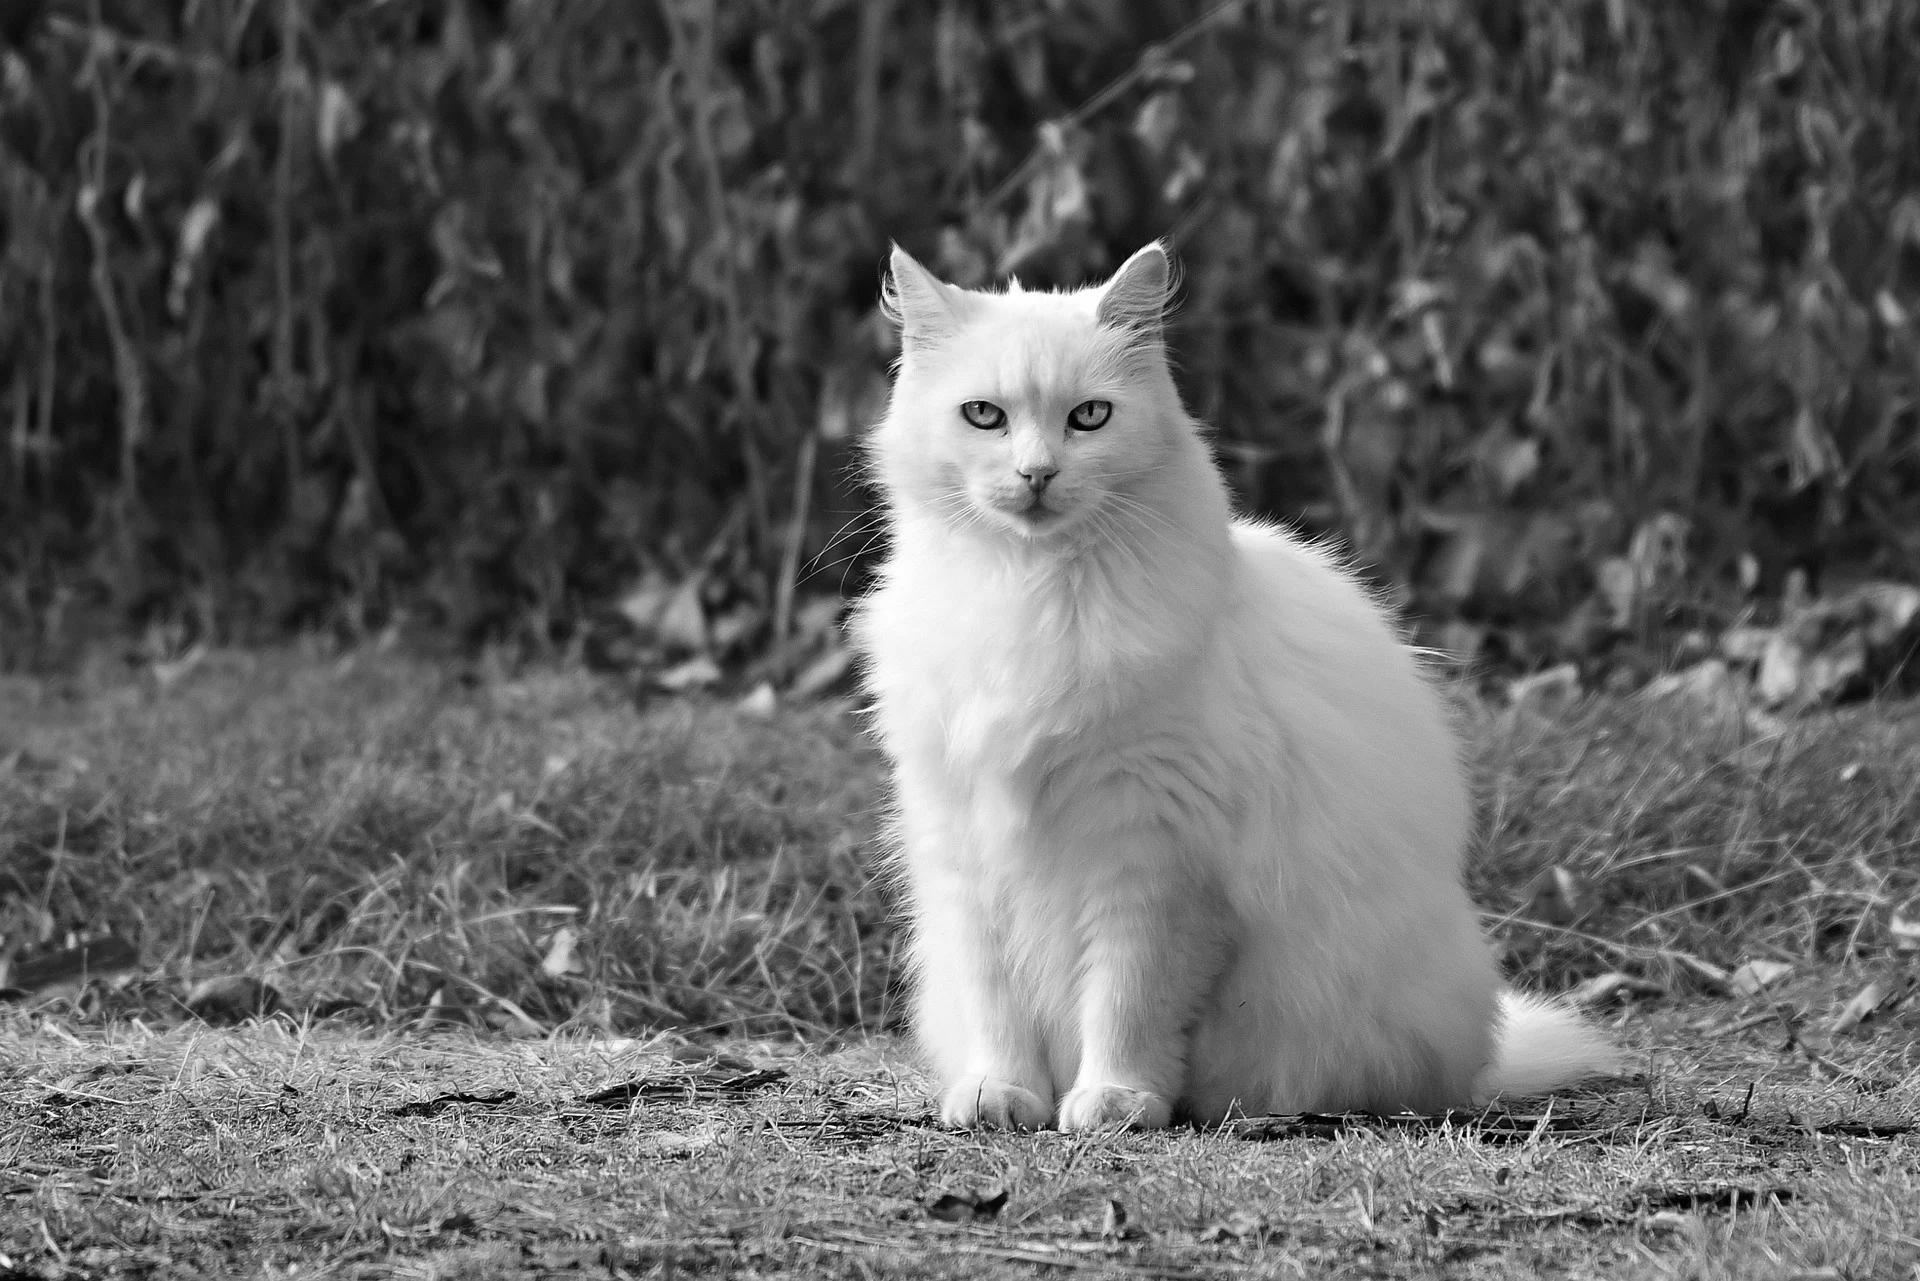

In [16]:
Image.fromarray(img_cv)

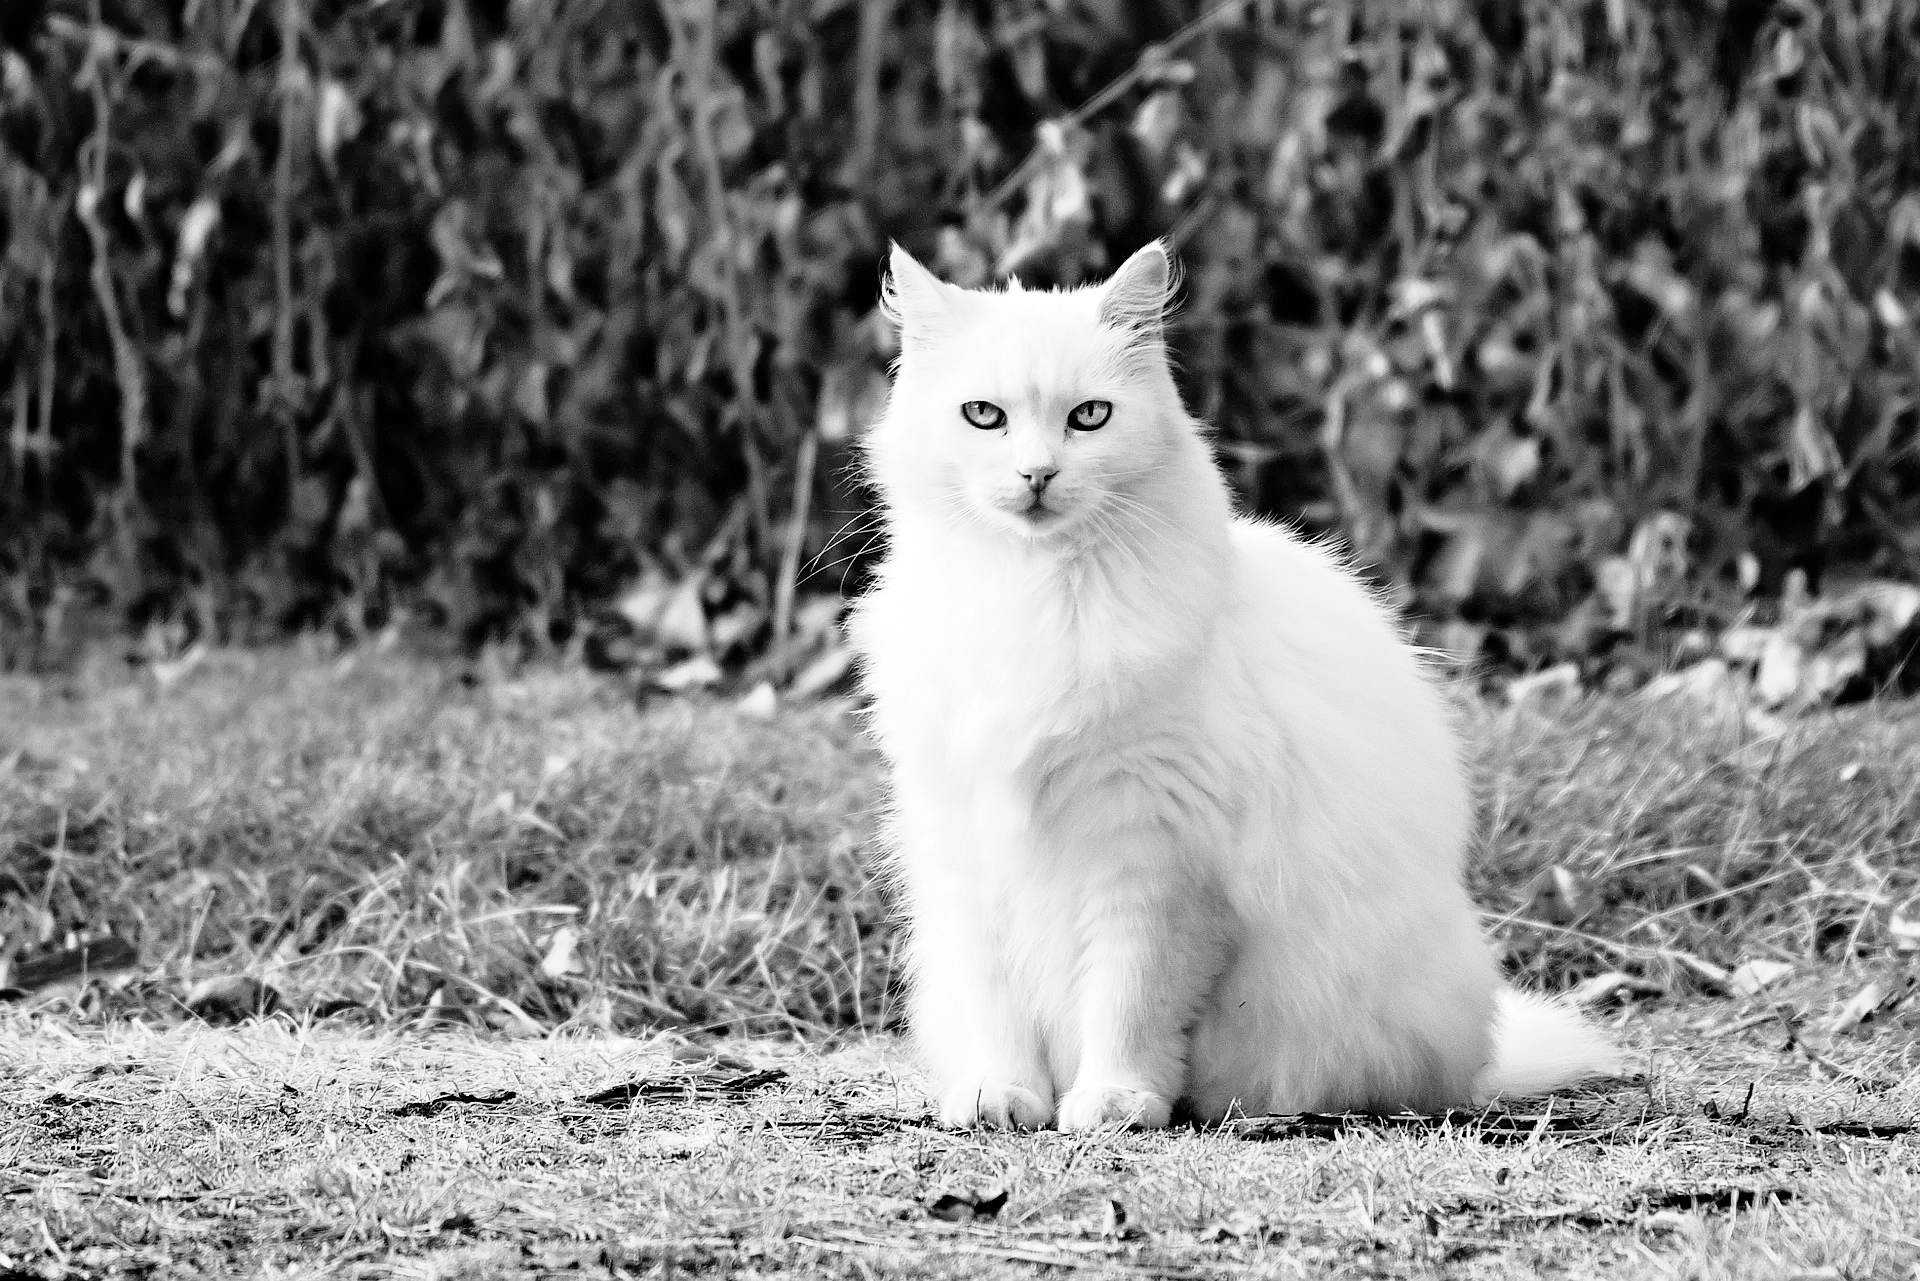

In [17]:
ImageOps.equalize(img.convert("L"), mask=None)

In [8]:
def otsu_threshold_finder(img):
    phuong_sai_t = 0
    
    M, N = img.shape
    mG = np.mean(img)
    
    for nguong in range(256):
        Tong_gt_xam_A = 1
        Tong_gt_xam_B = 1
        Tong_pixel_A = 1
        Tong_pixel_B = 1
        for i in range(M):
            for j in range(N):
                if (img[i, j] >= nguong):
                    Tong_pixel_A = Tong_pixel_A + 1
                    Tong_gt_xam_A = Tong_gt_xam_A + img[i , j]
                else:
                    Tong_pixel_B = Tong_pixel_B + 1
                    Tong_gt_xam_B = Tong_gt_xam_B + img[i , j]
                    
        P1 = Tong_pixel_A / (M * N)
        P2 = Tong_pixel_B / (M * N)
        
        m1 = Tong_gt_xam_A / Tong_pixel_A
        m2 = Tong_gt_xam_B / Tong_pixel_B
        
        phuong_sai = P1 * ((m1 - mG) ** 2) + P2 * ((m2 - mG) ** 2)
        
        if (phuong_sai > phuong_sai_t):
            phuong_sai_t = phuong_sai
            nguong_toi_uu = nguong
            
    print("Nguong tim duoc: ", nguong_toi_uu )
    return nguong_toi_uu    

In [18]:
def otsu(img):
    phuong_sai_t = 0 # Khởi tạo biến phuong_sai_t lưu giá trị phương sai để so sánh
                     # giá trị phương sai thuật toán tính được để xác định
                     # phương sai cực đại, trên cơ sở đó xác định ngưỡng tối ưu cần tìm
    M,N = img.shape
    mG = np.mean(img)   # Tính mG giá trị trung bình mức xám của ảnh theo công thức 6

    for nguong in range(256):
        Tong_gt_xam_A = 1  #Khởi tạo biến lưu tổng giá trị mức xám của nhóm A
        Tong_gt_xam_B = 1  #Khởi tạo biến lưu tổng giá trị mức xám của nhóm A
        Tong_pixel_A = 1    #Khởi tạo biến lưu tổng số pixel ở nhóm A
        Tong_pixel_B = 1    #Khởi tạo biến lưu tổng số pixel ở nhóm B
        for i in range(M):  #Duyệt qua giá trị xám của mỗi pixel của hình ảnh gốc
            for j in range(N):
                if (img[i,j] >= nguong):  #Nếu pixel có giá trị màu xám > = nguong (nhóm A)
                    Tong_pixel_A = Tong_pixel_A + 1  #Lấy tổng số pixel của phần A
                    Tong_gt_xam_A = Tong_gt_xam_A + img[i,j] # Lấy tổng giá trị xám của nhóm A
                else:     #Nếu pixel có giá trị xám < nguong (nhóm B)
                    Tong_pixel_B = Tong_pixel_B + 1  #Lấy tổng số pixel của nhóm B
                    Tong_gt_xam_B = Tong_gt_xam_B + img[i,j] # Lấy tổng giá trị xám của nhóm B

        P1 = Tong_pixel_A/(M*N) # Tính P1(k) theo công thức 4 và 3
        P2 = Tong_pixel_B/(M*N) # Tính P2(k) theo công thức 4 và 3
        m1 = Tong_gt_xam_A/Tong_pixel_A # Tính m1(k) theo công thức 5
        m2 = Tong_gt_xam_B/Tong_pixel_B # Tính m2(k) theo công thức 5
        phuong_sai = P1*((m1-mG)**2)+P2*((m2-mG)**2) # Tính phương sai theo công thức 7

        if (phuong_sai > phuong_sai_t): # xác định phương sai tối đa theo công thức 8
            phuong_sai_t = phuong_sai
            nguong_toi_uu = nguong  # Để có được ngưỡng tối ưu của phương sai tối đa

    print("Ngưỡng tìm được", nguong_toi_uu)
    return nguong_toi_uu

In [19]:
otsu(img_cv)

Ngưỡng tìm được 110


110

In [20]:
def Tim_nguong_toan_cuc(img): # Định nghĩa hàm tìm ngưỡng
    #Bước 1. Khởi tạo ngưỡng ban đầu t bằng giá trị trung bình mức xám của ảnh
    t=np.mean(img) #initial condition
    g1 = []  # Định nghĩa nhóm g1
    g2 = []  # Định nghĩa nhóm g2
    m,n = img.shape
    # Lặp để tính ngưỡng
    while (True):
        # Bước 2. Tạo nhóm g1,g2 dựa trên ngưỡng t
        for i in range(m):
            for j in range(n):
                if (img[i,j] < t):
                    g1.append(img[i,j])
                else:
                    g2.append(img[i,j])
        # Bước 3. Tính trung bình mức xám trong vùng g1,g2
        mu1 = np.mean(g1)
        mu2 = np.mean(g2)
        # Bước 4. Tính lại ngưỡng t có giá trị mới
        t = ((mu1+ mu2)/2)
        # Tính delta t để làm điều kiện thoát vòng lặp
        t0 = t
        delta_t = abs(t-t0)
        if(delta_t < 1):
            break
    print("Ngưỡng tìm được: ",t)
    return t

In [21]:
Tim_nguong_toan_cuc(img_cv)

Ngưỡng tìm được:  102.0059937910799


102.0059937910799